In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def read_indices(experiment, key, identificator):
    arr = np.loadtxt(f'{experiment}_indices/{key}_{identificator}')
    return arr

def read_dict(experiment, key):
    identificators = ['S1', 'S1_conf', 'ST', 'ST_conf', 'S1_conf_all', 'ST_conf_all']
    dict_indices = {}
    for identificator in identificators:
        dict_indices[identificator] = read_indices(experiment, key, identificator)
    return dict_indices

def make_dict_for_parameters(name_parameters, dict_indices):
    dict_final = {name: {} for name in name_parameters}
    for name in name_parameters:
        dict_final[name] = add_to_dict_for_parameters(name, name_parameters, dict_indices)
    return dict_final
def add_to_dict_for_parameters(name, name_parameters, dict_indices):
    identificators = ['S1', 'S1_conf', 'ST', 'ST_conf', 'S1_conf_all', 'ST_conf_all']
    dict_for_name = {}
    for identificator in identificators:
        index = name_parameters.index(name)
        dict_for_name[identificator] = dict_indices[identificator].T[index]
    return dict_for_name 

def make_final_dict(experiment, name_parameters):
    keys = ['peak', 'deaths', 'cases', 'severe', 'critical', 'mortality']
    identificators = ['S1', 'S1_conf', 'ST', 'ST_conf', 'S1_conf_all', 'ST_conf_all']
    final_dict = {}
    for key in keys:
        dict_indices = read_dict(experiment, key)
        final_dict[key] = make_dict_for_parameters(name_parameters, dict_indices)
    return final_dict

In [13]:
def sort_names(name_parameters, dict_for_parameters, identificator):
    inv_dict = {dict_for_parameters[name][identificator]: name for name in name_parameters}
    new = [dict_for_parameters[name][identificator] for name in name_parameters]
    newnew = sorted(new, reverse=True)
    names_in_order = [inv_dict[element] for element in newnew]
    return names_in_order

# names are in order which was printed when compute_indices.py was executed!

name_parameters = ['home_conts', 'work_conts', 'school_conts', 'random_conts', 'hh_sizes', 'hha_bysize', 'stud_teach', 'class_size', 'teach_teach', 'stud_all', 'stuff_deg', 'employment', 'cv_conts', 'age_distr', 'school_distr', 'work_distr', 'enrolment']

main_name_parameters = ['home_conts', 'work_conts', 'the_rest', 'hh_sizes', 'hha_bysize', 'stud_teach', 'class_size', 'age_distr', 'work_distr']

test22_names = ['age_distr', 'stud_teach', 'class_size', 'the_rest', 'hh_sizes', 'work_distr', 'home_conts', 'employment_rate']

In [16]:
final_dict = make_final_dict('main_1024_results', test22_names)

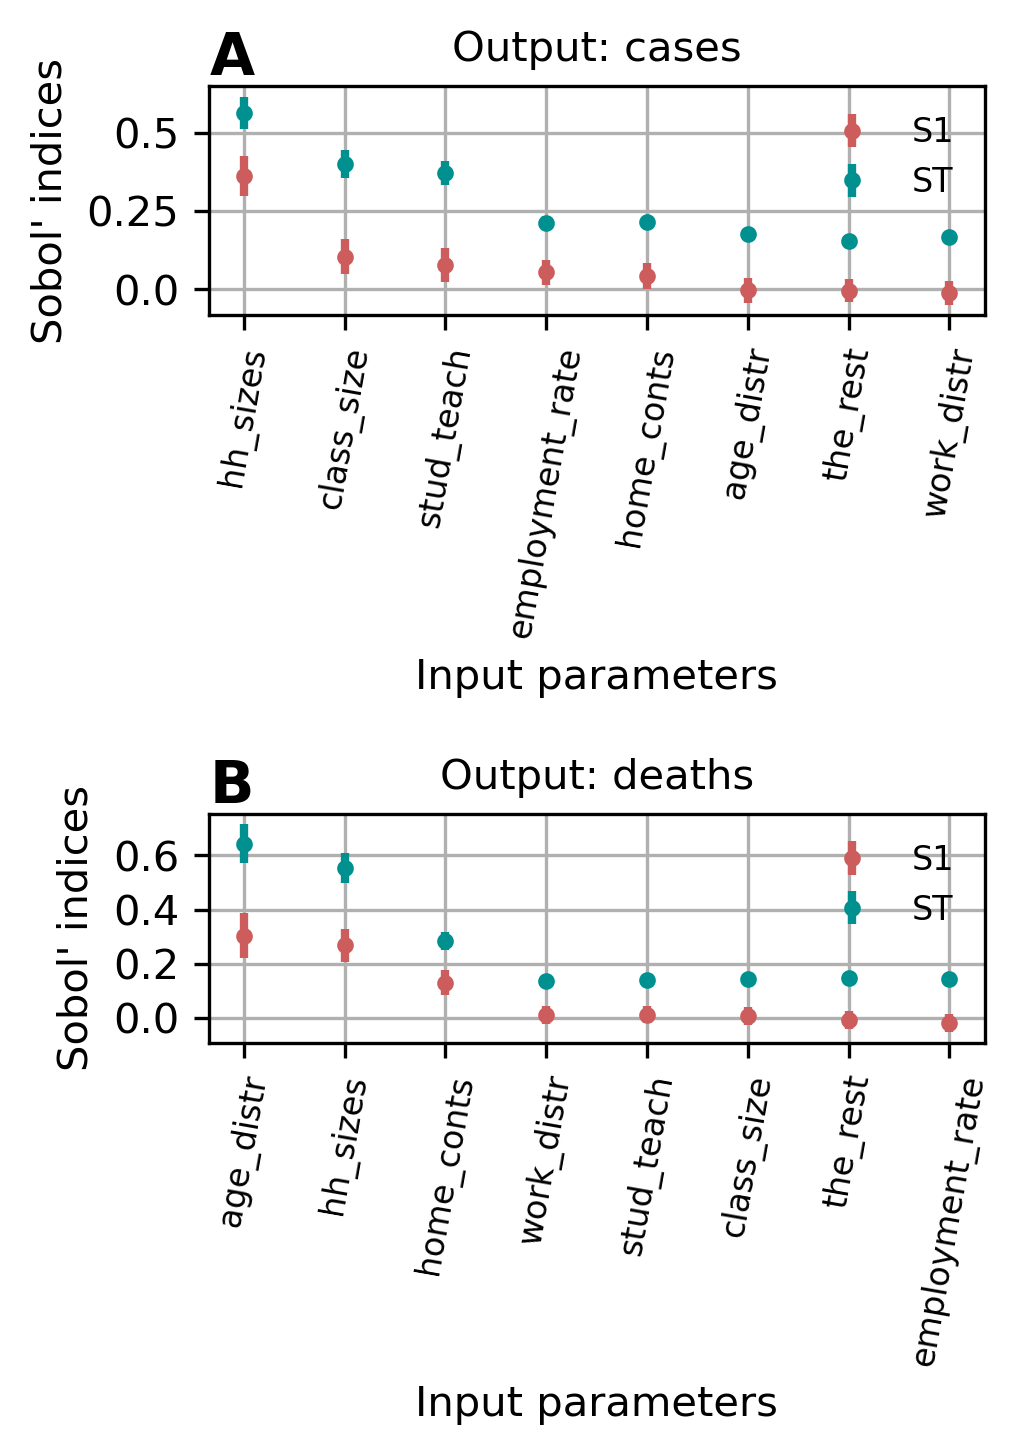

In [18]:
fig, (axs1, axs2) = plt.subplots(2, 1, figsize=(3.5, 5), dpi=300)
key = 'cases'
names_in_order = sort_names(test22_names, final_dict[key], 'S1')
axs1.set_ylabel("Sobol' indices", fontsize=10)
axs1.set_xlabel('Input parameters', fontsize=10)
axs1.set_xticks([i for i in range(1, 9)], labels=names_in_order, rotation=80, fontsize=8)
axs1.set_yticks([0.00, 0.25, 0.50, 0.75], labels = list(map(str, [0.00, 0.25, 0.50, 0.75])))
axs1.grid()

ax2 = axs1.errorbar(
    [i for i in range(1, 9)], [final_dict[key][name]['S1'] for name in names_in_order], fmt='o', markersize=2, color='indianred',
    yerr=[
        [final_dict[key][name]['S1_conf'] for name in names_in_order]
    ], markeredgewidth=2, elinewidth=2, label='S1'
)  

ax2 = axs1.errorbar(
    [i for i in range(1, 9)], [final_dict[key][name]['ST'] for name in names_in_order], fmt='o', markersize=2, color='#009090',
    yerr=[
        [final_dict[key][name]['ST_conf'] for name in names_in_order]
    ], markeredgewidth=2, elinewidth=2, label='ST'
)  

legend = axs1.legend(loc='upper right', fontsize=8)
legend.get_frame().set_alpha(0)
axs1.set_title(f'Output: {key}', fontsize=10)
axs1.text(x=0., y=1.05, s=r'$\bf{A}$', fontsize=14, transform=axs1.transAxes)

key = 'deaths'
names_in_order = sort_names(test22_names, final_dict[key], 'S1')
axs2.set_ylabel("Sobol' indices", fontsize=10)
axs2.set_xlabel('Input parameters', fontsize=10)
axs2.set_xticks([i for i in range(1, 9)], labels=names_in_order, rotation=80, fontsize=8)
axs2.set_yticks([0.0, 0.2, 0.4, 0.6], labels = list(map(str, [0.0, 0.2, 0.4, 0.6])))
plt.grid()

ax2 = axs2.errorbar(
    [i for i in range(1, 9)], [final_dict[key][name]['S1'] for name in names_in_order], fmt='o', markersize=2, color='indianred',
    yerr=[
        [final_dict[key][name]['S1_conf'] for name in names_in_order]
    ], markeredgewidth=2, elinewidth=2, label='S1'
)  

ax2 = axs2.errorbar(
    [i for i in range(1, 9)], [final_dict[key][name]['ST'] for name in names_in_order], fmt='o', markersize=2, color='#009090',
    yerr=[
        [final_dict[key][name]['ST_conf'] for name in names_in_order]
    ], markeredgewidth=2, elinewidth=2, label='ST'
)  

legend = axs2.legend(loc='upper right', fontsize=8)
legend.get_frame().set_alpha(0)
axs2.set_title(f'Output: {key}', fontsize=10)
axs2.text(x=0., y=1.05, s=r'$\bf{B}$', fontsize=14, transform=axs2.transAxes)
plt.tight_layout()